<a href="https://colab.research.google.com/github/ayearias84/Raman/blob/main/Prueba1_Aye_Raman_plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os #provides a way of using operating system dependent functionality.#

In [ ]:
# hola cambiamos cosas

In [ ]:
# ayeee

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


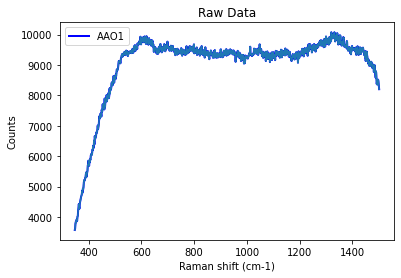

In [ ]:
from google.colab import drive # importar data que tengo en mi drive 
drive.mount('/content/drive') # importar data que tengo en mi drive, debo copiar el pathfile
import pandas as pd
data=pd.read_csv('/content/drive/MyDrive/AAO1.txt',sep="\t",decimal=".") # aunque sea un txt lo abro con read_csv
#data.head() me muestra los datos del file
xData=data.iloc[:,0]
yData=data.iloc[:,1]
plt.plot(xData,yData,linewidth=2,color='b',label='AAO1')
plt.plot(xData,yData)
plt.xlabel('Raman shift (cm-1)')
plt.ylabel('Counts')
plt.title('Raw Data')
plt.legend() # ver como captar la leyenda desde el nombre del archivo
plt.show()


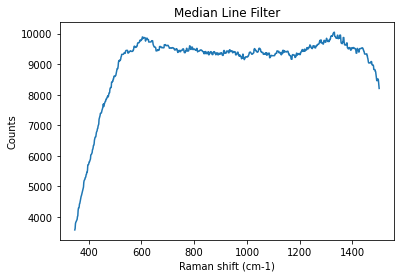

In [ ]:
##########################################
# Noise  Correction and baseline fitting
##########################################

##import the scipy signal library  #peak finding noisereomval#
import scipy.signal as ss
### Median filter, see 5 values, do the medium and replace the value with average, keeps the number of data points#
### https://docs.scipy.org/doc/scipy/reference/signal.html ###

yData_med=ss.medfilt(yData,5) 
plt.plot(xData,yData_med)
plt.title("Median Line Filter")
plt.xlabel('Raman shift (cm-1)')
plt.ylabel('Counts')
plt.show()


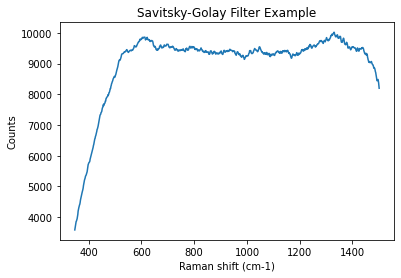

In [ ]:
###  A1 # Savitsky-Golay filter ###
### ss.savgol_filter(x, window_length, polyorder, deriv=0, delta=1.0, axis=- 1, mode='interp', cval=0.0)  ###
yData_sav=ss.savgol_filter(yData,5,1) # see again 5 points for polynomial fit and smoothing
plt.plot(xData,yData_sav, label='Sav-Gol Filter1')
plt.title("Savitsky-Golay Filter Example")
plt.xlabel('Raman shift (cm-1)')
plt.ylabel('Counts')
plt.show()

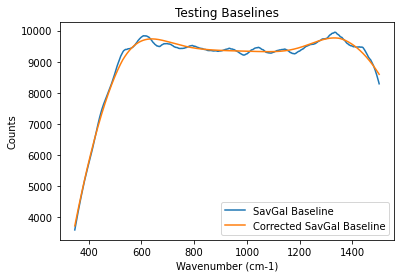

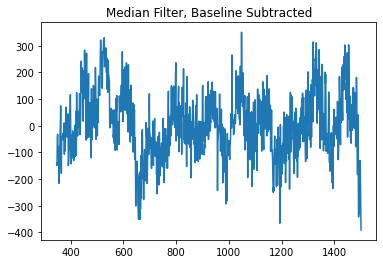

In [ ]:
### A2 # Crude SavGal Baseline fitting  ###
SavGalBaseline=ss.savgol_filter(yData,51,2) #51 something with size in stead of 71#
plt.plot(xData,SavGalBaseline, label='SavGal Baseline')
#plt.title("Crude Baseline")
#plt.show()

### A3# Now let's correct the baseline to make it a bit smoother ###
for ii in range(51,300,30):   # range (start51,stop300,step30)#
   SavGalBaseline= ss.savgol_filter(SavGalBaseline,ii,2)
##over baseline
##baseline= baseline -10 #so he corrects the position of the baseline
plt.plot(xData,SavGalBaseline, label='Corrected SavGal Baseline')
plt.title("Testing Baselines")
plt.xlabel('Wavenumber (cm-1)')
plt.ylabel('Counts')
plt.legend()
plt.show()

### Finally subtract the baseline  ###
#modData= yData_sav - SavGalBaseline
modData= yData - SavGalBaseline
#modData= yData - Baseline
#modData= yData_med - SavGalBaseline
plt.plot(xData, modData)
plt.title("Savitsky-Golay Filter, Baseline Subtracted")
plt.title("Median Filter, Baseline Subtracted")
plt.show()


In [ ]:
subfolder = os.path.join(os.path.dirname(s.source), 'BLcorr_Data') #crea la subcarpeta 
if not os.path.exists(subfolder):
    os.mkdir(subfolder)

filename=os.path.join (subfolder,os.path.basename (os.path.splitext(s.source)[0]+"SG.txt"))
np.savetxt(filename, modData) #to save the fitted y results in subfolder# 

NameError: ignored

In [ ]:
#!git clone https://github.com/ayearias/ramanspectrum.git # este repositorio lo puede clonar bien, no tira error
#!git clone https://github.com/ayearias84/8septprueba.git # no entiendo pq tira error??!!!

no  puedo leer txt files alojados en mi pc

In [ ]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os #provides a way of using operating system dependent functionality.#


file = pd.read_csv('AAO1.txt',sep="\t",decimal=".") # no entiendo por que no anda desde mi pc????
x=file.iloc[:,0]
y=file.iloc[:,1]
plt.plot(x,y,linewidth=2,color='b')
plt.show()

In [ ]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os #provides a way of using operating system dependent functionality.#

### Define a custom class to organize all data
### This class is designed to work specifically with the files provided in R6G_CWUHVTERS
###indentation is very important
class Spectrum:
    def __init__(self,filename):
        if not os.path.isfile(filename):
            raise Exception("Spectrum object needs a valid filename")
        self.source     = filename
        #print (self.source)
        #print (f)
        info            = os.path.basename(f).split('_')[-10:]
        #self.number     = info[0]  #toma el 1er elemento de info
        try:
            self.number     = int(info[0])  # int() function converts the specified value into an integer number#
        except ValueError:
            print ('s.number not a valid integer')
        self.data       = np.genfromtxt(self.source,usecols=(1))
        ### genfromtxt(fname, dtype, comments, delimiter, skip_header, skip_footer, converters, missing_values, filling_values, usecols, names, excludelist, deletechars, replace_space, autostrip, case_sensitive, defaultfmt, unpack, usemask, loose, invalid_raise, max_rows, encoding, like) ###
        ###importante todo lo q dice self luego sera reemplazable, ver archivo siguiente del curso###
        
# Import the x-axis
# Load all spectra into an array, first get all file names, then create Spectrum objects
xData=np.genfromtxt("C:\\Users\\Aye\\Desktop\\DATA\\AAO-España 2022\\000\\20220728_785_AAO\\M8A2\\well 1 dryM8A2 AAOnwell Au10nm 1HTspain_well1\\* HT1mM4d controlMQ1d_785_CCD1024_g1200_c950_50xL_strl_i10_10s_1acc_map1_X6Y5_10x10um_1_0__X_4993.99__Y_6939.65__Time_0__*txt", usecols=(0))
#print (len(xData))
#print (xData)

allfiles=glob.glob("C:\\Users\\Aye\\Desktop\\DATA\\AAO-España 2022\\000\\20220728_785_AAO\\M8A2\\well 1 dryM8A2 AAOnwell Au10nm 1HTspain_well1\\* HT1mM4d controlMQ1d_785_CCD1024_g1200_c950_50xL_strl_i10_10s_1acc_map1_*txt")
#print (allfiles)

spectra=[]
for f in allfiles:
    spectra.append(Spectrum(f))  #the only important spaces are the one at the begging = indentation space#
for s in spectra:
#    print (s.source)
#    print (s.number)

    ### Let's sort them based on the appropriate number
    import operator as op
    spectra.sort(key=op.attrgetter('number')) #sort is a function, we will sort by numbers, number is the attribut
    #for s in spectra: #sorted number listed is a function, we will sort by numbers, number is the attribute
    #print (s.number)
#print (len(spectra))
    
yData=spectra[2].data #shortcut to work easily selected data he know works that is not too noisy #
#print (s.source)
#print (os.path.splitext(s.source)[0])
#print (len(yData))

#### Let's make a basic plot of one of the data sets#
plt.plot(xData,yData)
plt.xlabel('Raman shift')
plt.ylabel('Counts')
plt.title('Raw Data')
plt.show()